### Project Title: Movie Rating Prediction With Python
#### Done By: Nozipho Sithembiso Ndebele
---

<div style="text-align: center;">
<img src="https://storage.googleapis.com/kaggle-datasets-images/1867204/3122809/6dd06ad75dfe450aeaf370a7348600f3/dataset-card.jpg?t=2022-02-01-05-41-22" alt="Movie Image" width="1000"/>
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**

The IMDb India Movies dataset is a curated collection of Indian movies listed on IMDb, capturing essential information such as titles, ratings, genres, and the individuals involved in each film (actors, directors). The dataset offers a rich opportunity for exploratory data analysis (EDA), trend detection, and insights into the Indian film industry over time.


### Purpose
The main objective of this project is to:

- Clean and preprocess the dataset by handling missing values and standardizing data formats.

- Perform exploratory data analysis to understand trends in ratings, duration, votes, genres, and roles of actors/directors.

- Identify key patterns and trends such as top-rated movies, most active directors, and yearly performance metrics.

- Build predictive models to understand factors influencing movie ratings or popularity.


### Significance
This dataset provides a comprehensive view of:

- Evolution of the Indian film industry over the years.

- Audience preferences, gauged via votes and ratings.

- Influence of movie duration and genre on viewer perception.

- Trends related to popular actors and directors.

It is an excellent foundation for beginner to intermediate projects in data cleaning, EDA, visualization, and predictive modeling.

### Problem Domain
The dataset opens up multiple areas of inquiry:

- Time series trends: How have ratings or the number of movies changed over the years?

- Impact analysis: Does movie duration or genre affect its IMDb rating?

- Popularity vs. quality: Do high vote counts correlate with higher ratings?

- Industry contributions: Which directors and actors have contributed the most to Indian cinema?

- These questions can be answered through:

  - Cleaning and preprocessing (e.g., handling nulls in actors and genres).

  - Aggregation and grouping operations.

  - Visualization (using Matplotlib, Seaborn, or Plotly).

  - Building regression or classification models (e.g., predicting high vs low-rated movies).


### Challenges
- Missing data: Many null values in actor, director, and genre columns.

- Data inconsistency: Genre, duration, and names might have inconsistent formats or typos.

- Multiple entries: A movie may be listed under multiple genres or actors, requiring careful parsing.

- Imbalanced popularity: Some movies may have a high number of votes but poor ratings (or vice versa).

- Bias in ratings: Ratings might be skewed by popularity or recency effects.

### Key Questions
- What is the trend of movie ratings across different years?

- Which year had the best average rating?

- Does movie duration impact the rating?

- What are the top 10 movies by rating per year and overall?

- Which directors have directed the most movies?

- Which actors frequently appear across top-rated movies?

- What genres are most commonly associated with high ratings?

- Are more movies being released over the years?

- Can we predict the success (high rating) of a movie based on features like duration, genre, and director?



---
<a href=#one></a>
## **Importing Packages**

### Purpose
To set up the Python environment with the necessary libraries for data manipulation, visualization, and machine learning. These libraries will facilitate data preprocessing, feature extraction, model training, and evaluation.

### Details
* Pandas: For handling and analyzing data.

* NumPy: For numerical operations.

* Matplotlib/Seaborn: For data visualization to understand trends and patterns.

* scikit-learn: For building and evaluating machine learning models.

* NLTK/Spacy: For text preprocessing and natural language processing tasks.

---

In [ ]:
# Import necessary packages  

# Data manipulation and analysis  
import pandas as pd  # Pandas for data handling  
import numpy as np  # NumPy for numerical operations  

# Data visualization  
import matplotlib.pyplot as plt  # Matplotlib for static plots  
import seaborn as sns  # Seaborn for statistical visualization  
import plotly.express as px  # Plotly for interactive plots  

# Natural Language Processing  
import nltk  # Natural Language Toolkit  
from nltk.corpus import stopwords  # Stopword removal  
from nltk.tokenize import word_tokenize  # Tokenization  
import re  # Regular expressions for text cleaning  

#Modelling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import pickle
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib


# Configure visualization settings
sns.set(style='whitegrid')  # Set the default style for Seaborn plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for Matplotlib

# Suppress warnings
import warnings  # Import the warnings module
warnings.filterwarnings('ignore')  # Ignore all warning messages


---
<a href=#two></a>
## **Data Collection and Description**
### Purpose
To understand the structure and content of the IMDb India Movies dataset for analysis and model-building.

### Details
- Source: IMDb (scraped and compiled)

- Format: CSV

- Rows: ~13,800+

- Columns: 10

### Types of Data
- `Name`	Title of the movie
- `Year`	Year of release
- `Duration`	Movie duration (in minutes)
- `Genre`	Primary and secondary genres (can be multi-label)
- `Rating`	IMDb user rating
- `Votes`	Number of user votes
- `Director`	Name of the movie's director
- `Actor 1`	Lead actor
- `Actor 2`	Supporting actor
- `Actor 3`	Supporting actor


---
<a href=#three></a>
## **Loading Data**
### Purpose
The purpose of this section is to load the dataset into the notebook for further manipulation and analysis. This is the first step in working with the data, and it allows us to inspect the raw data and get a sense of its structure.

### Details
In this section, we will load the dataset into a Pandas DataFrame and display the first few rows to understand what the raw data looks like. This will help in planning the next steps of data cleaning and analysis.


---

In [174]:
# Load the dataset into a Pandas DataFrame

# The dataset is stored in a CSV file named 'IMDb Movies India.csv'
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')

In [175]:
# df is the original dataset (DataFrame), this creates a copy of it
df_copy = df.copy()

# Now 'df_copy' is an independent copy of 'df'. Changes to 'df_copy' won't affect 'df'.


In [176]:
# Display the first few rows of the dataset to get a sense of what the raw data looks like
df_copy.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [177]:
# Display the number of rows and columns in the dataset to understand its size
df_copy.shape

(15509, 10)

In [178]:
# Check the structure of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
Before analyzing the data, it is crucial to clean and filter it. This process involves handling missing values, removing outliers, correcting errors, and possibly reducing the data by filtering out irrelevant features. These steps ensure that the analysis is based on accurate and reliable data.

Details
In this section, we will:

* Check for Missing Values: Identify if there are any missing values in the dataset and handle them accordingly.
* Remove Duplicates: Ensure there are no duplicate rows that could skew the analysis.
* Correct Errors: Look for and correct any obvious data entry errors.
* Filter Data: Depending on the analysis requirements, filter the data to include only relevant records.

In [179]:
# 1. Check for missing values in the dataset

def check_missing_values(df):
    """
    Check for missing values in the dataset and display the number of missing values per column.

    Parameters:
    df (pandas.DataFrame): The dataset to check for missing values.

    Returns:
    pandas.Series: A series showing the number of missing values for each column.
    """
     # Check for missing values in the dataset and display them
    print("Missing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values)
    return missing_values


In [180]:
# df_copy is your DataFrame
missing_values = check_missing_values(df_copy)


Missing values per column:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


After examining the dataset, missing values were identified in some  columns. All other columns are complete, ensuring data integrity for most features. Depending on the analysis goals, handling these missing values may be necessary through imputation or other data-cleaning techniques.

##### Drop rows with missing `Rating` (our prediction target)

In [181]:
df_cleaned = df_copy.dropna(subset=['Rating']).reset_index(drop=True)
print(f"Remaining rows after dropping missing ratings: {df_cleaned.shape[0]}")


Remaining rows after dropping missing ratings: 7919


##### Clean Year column
Some values are wrapped in parentheses like (2019). Let's extract the year properly:

In [182]:
df_cleaned['Year'] = df_cleaned['Year'].str.extract(r'(\d{4})')
df_cleaned['Year'] = pd.to_numeric(df_cleaned['Year'], errors='coerce')

#### Clean Duration column

Remove "min" and convert to integer:

In [183]:
df_cleaned['Duration'] = df_cleaned['Duration'].str.extract(r'(\d+)')
df_cleaned['Duration'] = pd.to_numeric(df_cleaned['Duration'], errors='coerce')


##### Clean Votes column
Votes might have commas (e.g. '1,234'), remove them and convert to numeric:

In [184]:
df_cleaned['Votes'] = df_cleaned['Votes'].str.replace(',', '')
df_cleaned['Votes'] = pd.to_numeric(df_cleaned['Votes'], errors='coerce')


#### Drop or impute remaining NA values (if minimal)
Let’s drop any remaining rows with missing essential values:

In [185]:
df_cleaned.dropna(subset=['Year', 'Duration', 'Votes', 'Genre', 'Director', 'Actor 1'], inplace=True)
df_cleaned.reset_index(drop=True, inplace=True)
print(f"Final cleaned shape: {df_cleaned.shape}")


Final cleaned shape: (5746, 10)


In [186]:
df_copy = df_cleaned

In [187]:
df_copy.shape

(5746, 10)

In [188]:
# 2.Checks for duplicate rows

def remove_duplicates(df):
    """
    Checks for duplicate rows in the dataset and removes them if any are found.

    Args:
    df (pandas.DataFrame): The dataframe to check for duplicate rows.

    Returns:
    pandas.DataFrame: The dataframe with duplicate rows removed, if any existed.
    """
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # Remove duplicates if any exist
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicate rows removed. Updated dataframe has {len(df)} rows.")
    else:
        print("No duplicate rows found.")
    
    return df

In [189]:
df_copy = remove_duplicates(df_copy)


Number of duplicate rows: 0
No duplicate rows found.


Upon reviewing the dataset, no duplicate rows were found. This ensures that all records are unique, and no further action is required for data deduplication.


## **Saving the Cleaned Dataset**
### Purpose

This section outlines how to save the cleaned dataset for future use. Saving the dataset ensures that the data cleaning process does not need to be repeated and allows for consistent use in subsequent analyses.

### Details

We will save the cleaned dataset as a CSV file.

In [190]:
#3. Save the cleaned dataset to a new CSV file

def save_cleaned_dataset(df, filename='cleaned_IMDb_Movies_India.csv'):
    """
    Saves the cleaned dataframe to a CSV file.

    Args:
    df (pandas.DataFrame): The cleaned dataframe to save.
    filename (str): The name of the file to save the dataframe to (default is 'cleaned_IMDb_Movies_India.csv').

    Returns:
    None
    """
    # Save the cleaned dataset to a CSV file
    df.to_csv(filename, index=False)
    print(f"Cleaned dataset saved successfully as '{filename}'.")


In [191]:
save_cleaned_dataset(df_copy)


Cleaned dataset saved successfully as 'cleaned_IMDb_Movies_India.csv'.


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**

It is the process of analyzing datasets to summarize key features, often through visualization methods. It aims to discover patterns, spot anomalies, and formulate hypotheses for deeper insights, which informs subsequent analysis.
#### Advantages

- Helps in understanding the data before modeling.
- Provides insights that guide feature selection and engineering.
- Assists in choosing appropriate modeling techniques.
- Uncovers potential data quality issues early.

`The following methods were employed to communicate our objective:`



---


1.  Ratings Distribution

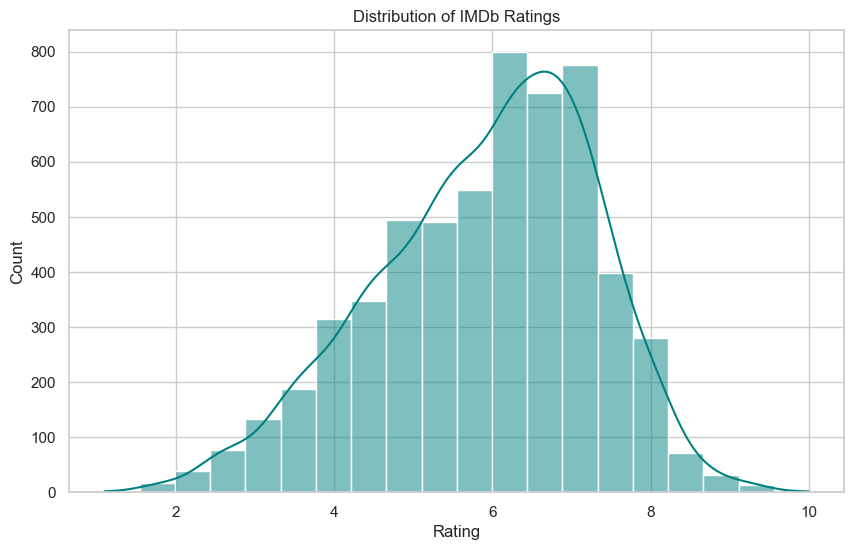

In [192]:
sns.histplot(df_copy['Rating'], bins=20, kde=True, color='teal')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


- The distribution of ratings appears to follow a normal-like bell curve, with most movies clustered around the 6.0–7.5 rating range.

- Very few movies are rated below 4 or above 9.

   - Insight: Ratings are generally skewed positively, suggesting IMDb users tend to rate movies favorably unless they're exceptionally poor.

2. Rating by Year

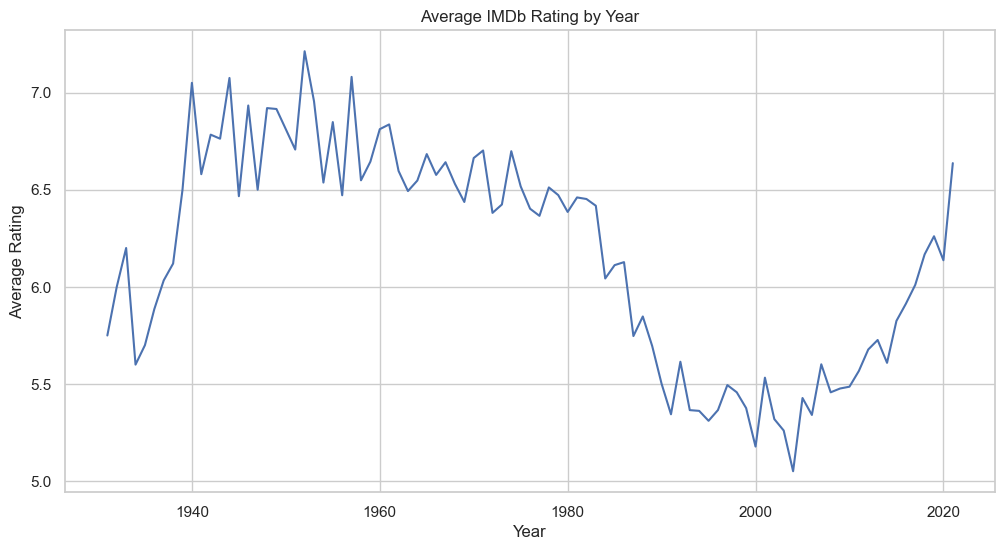

In [193]:
ratings_by_year = df_copy.groupby('Year')['Rating'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=ratings_by_year.index, y=ratings_by_year.values)
plt.title('Average IMDb Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


- Average rating per year shows minor fluctuations, with some peaks and troughs.

- No significant upward or downward trend, though some recent years may show a dip (possibly due to fewer votes or lower-budget films).

- Insight: Despite growth in the number of movies, quality (in terms of rating) remains relatively stable. External factors like streaming or vote inflation may influence recent ratings

3. Votes vs Rating

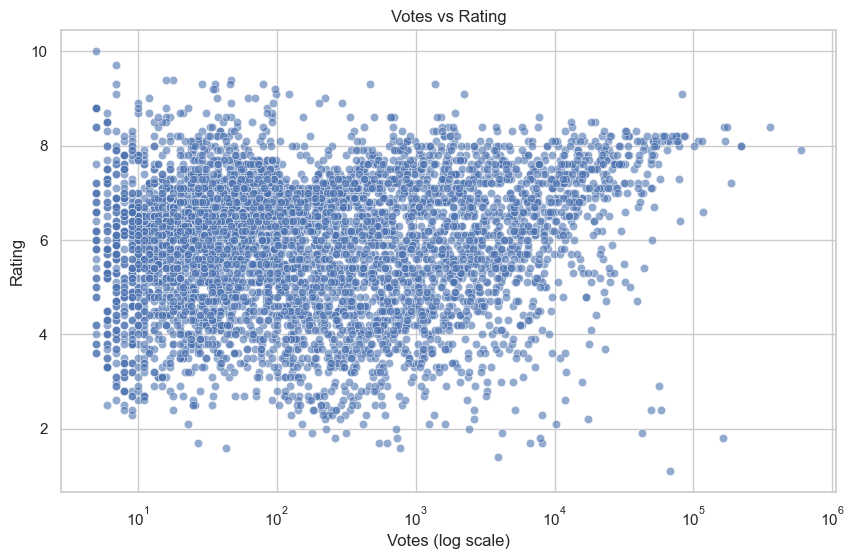

In [194]:
sns.scatterplot(data=df_copy, x='Votes', y='Rating', alpha=0.6)
plt.title('Votes vs Rating')
plt.xscale('log')  # use log scale to handle skewed votes
plt.xlabel('Votes (log scale)')
plt.ylabel('Rating')
plt.show()


- There’s no strong correlation between vote count and rating.

- Some highly voted movies have average or even low ratings.

- Insight: Popularity ≠ quality. Mass appeal does not guarantee critical acclaim. High vote count might reflect marketing or star power more than quality.

4. Duration vs Rating

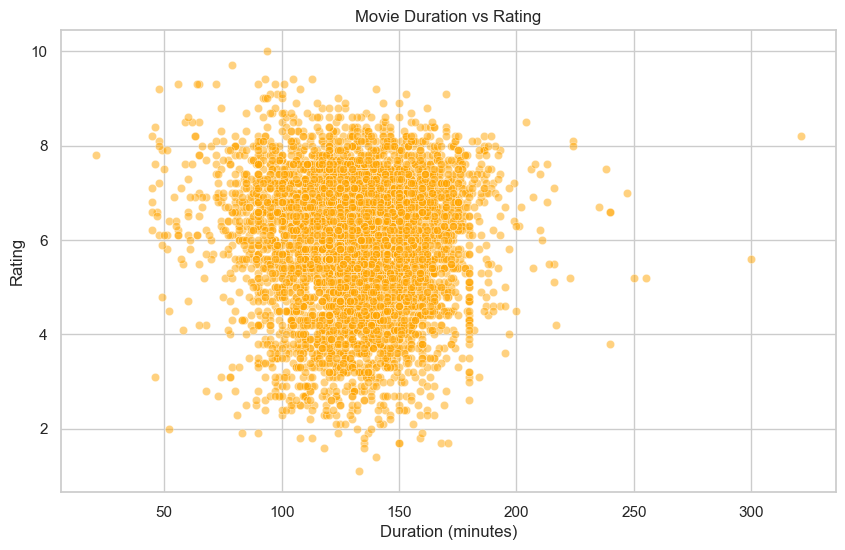

In [195]:
sns.scatterplot(data=df_copy, x='Duration', y='Rating', alpha=0.5, color='orange')
plt.title('Movie Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


- Most movies fall within the 90–150 minutes range.

- Ratings are fairly consistent across different durations, but:

   - Extremely short or long films are less frequent and tend to have more variable ratings.

- Insight: Duration has little effect on ratings, though mid-length movies (100–130 mins) dominate both in volume and stability.

5. Top 10 Genres by Average Rating

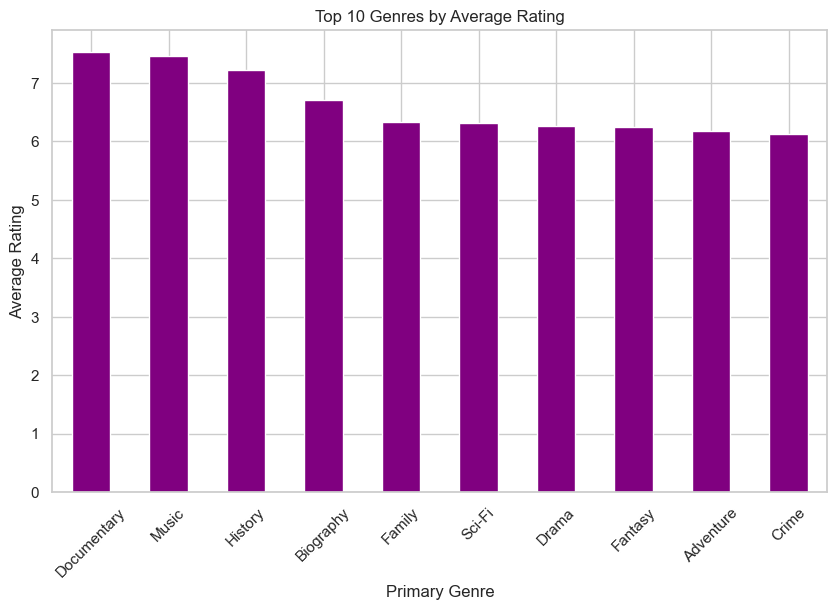

In [196]:
df_copy['Primary Genre'] = df_copy['Genre'].str.split(',').str[0]
top_genres = df_copy.groupby('Primary Genre')['Rating'].mean().sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Genres by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Primary Genre')
plt.xticks(rotation=45)
plt.show()


- Genres like Documentary, Biography, and Drama top the average rating chart.

- Action and Romance genres are rated slightly lower on average.

- Insight: Thought-provoking or real-life genres resonate more deeply with IMDb audiences, while formulaic genres may underperform in ratings.

6. Number of movies released per year:

Text(0.5, 1.0, 'Number of Movies Released per Year')

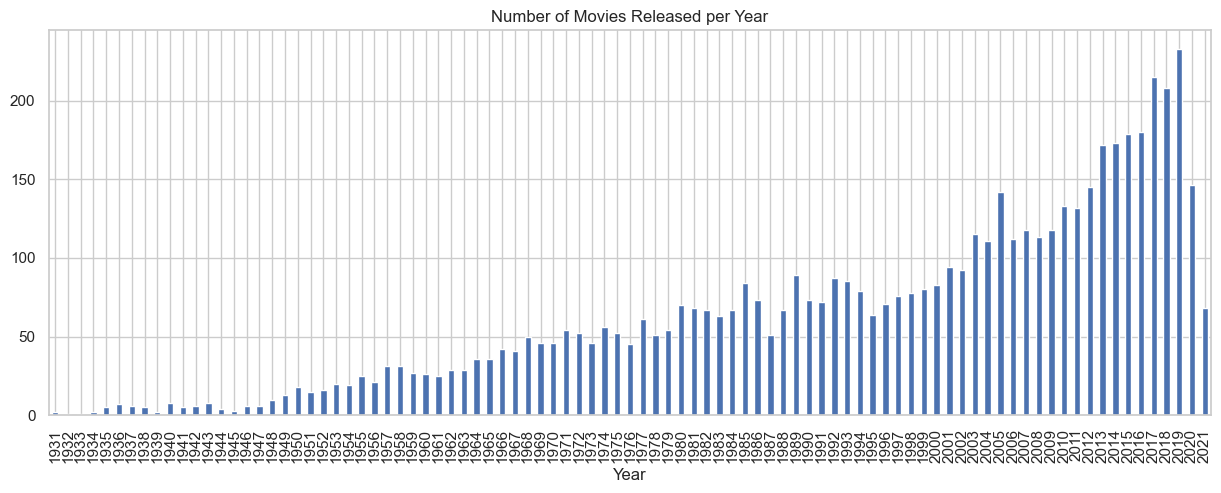

In [197]:
movies_per_year = df_copy['Year'].value_counts().sort_index()
movies_per_year.plot(kind='bar', figsize=(15,5))
plt.title("Number of Movies Released per Year")


- Clear growth over time, especially post-2000s.

- Peaks in recent years (before 2020) suggest increased film production.

- Insight: The Indian film industry is expanding, especially in the digital age. This boom may also lead to variability in quality.

7. Genre popularity (count)

Text(0.5, 1.0, 'Most Common Genres')

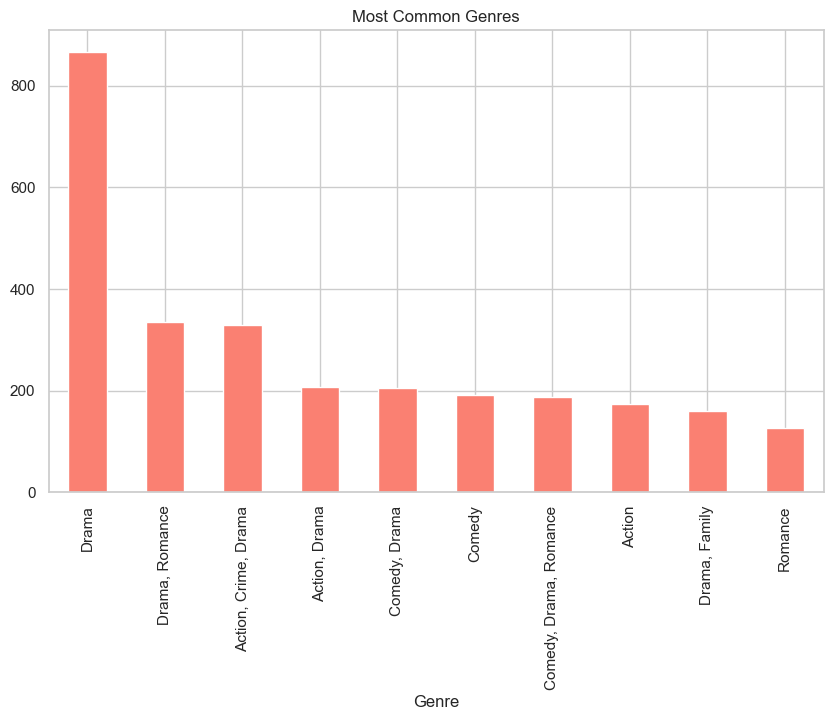

In [198]:
df_copy['Genre'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title("Most Common Genres")


- Drama is the most frequent genre, followed by Comedy and Romance.

- These genres reflect mainstream Bollywood storytelling patterns.

- Insight: Genre frequency correlates with mass appeal rather than quality. The most frequent genres aren’t always the highest rated.

8. Top 10 directors by number of movies

Text(0.5, 1.0, 'Top 10 Most Active Directors')

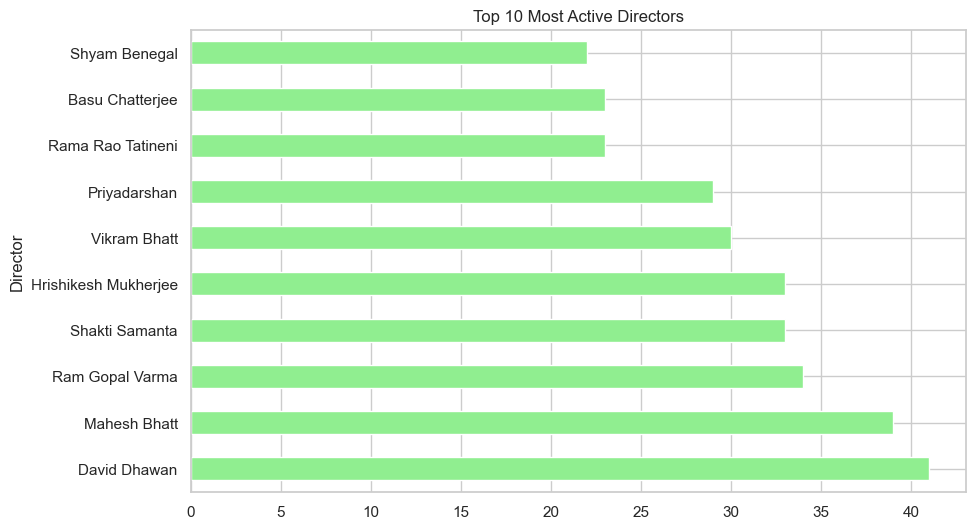

In [199]:
df_cleaned['Director'].value_counts().head(10).plot(kind='barh', color='lightgreen')
plt.title("Top 10 Most Active Directors")


- Certain directors are extremely prolific, possibly contributing to multiple genres and styles.

- However, quantity doesn't necessarily mean high average rating.

- Insight: Prolific directors shape trends in the industry, and their filmographies are ideal for case studies in directing style vs. audience reception.

9. Correlation Heatmap

Helps identify relationships between numeric variables

Text(0.5, 1.0, 'Correlation Heatmap')

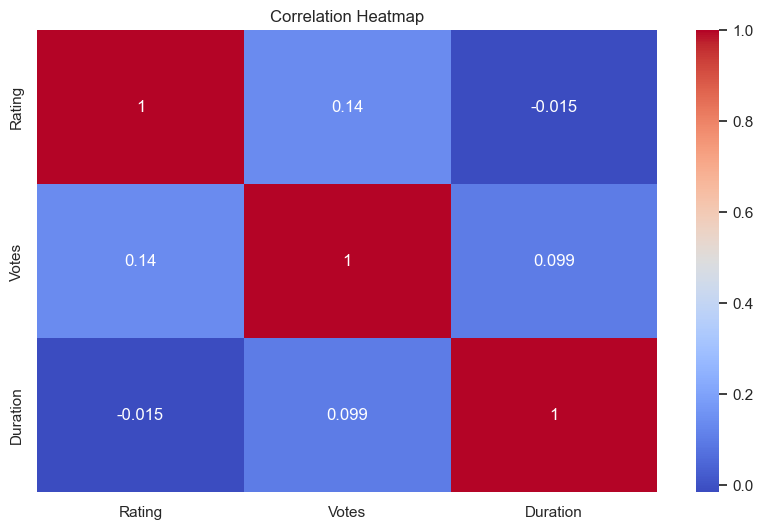

In [200]:
sns.heatmap(df_cleaned[['Rating', 'Votes', 'Duration']].astype(float).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


- Moderate positive correlation between votes and rating (but not strong).

- Duration has very low correlation with rating.

- Insight: Predictive modeling should focus more on votes, genre, year, and people involved (e.g., directors/actors) than on duration.

10.  Top 10 directors by Avarage Rating

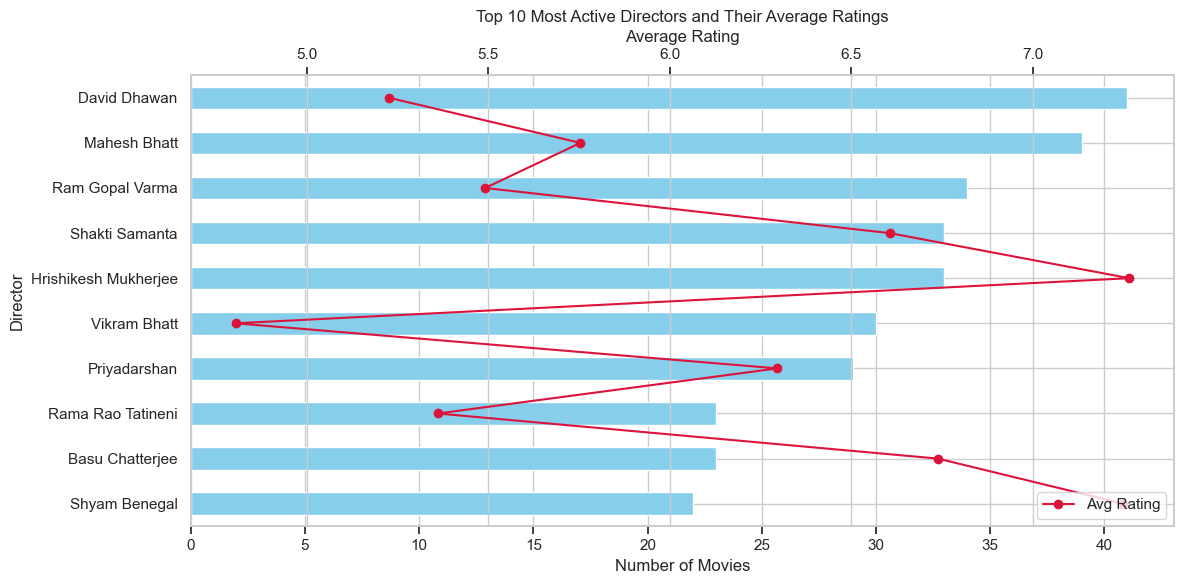

In [201]:
top_directors = df_copy['Director'].value_counts().head(10).index
director_stats = df_copy[df_copy['Director'].isin(top_directors)].groupby('Director').agg({
    'Name': 'count',
    'Rating': 'mean'
}).rename(columns={'Name': 'Movie Count', 'Rating': 'Average Rating'}).sort_values('Movie Count', ascending=True)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for movie count
director_stats['Movie Count'].plot(kind='barh', color='skyblue', ax=ax1)
ax1.set_xlabel('Number of Movies')
ax1.set_ylabel('Director')
ax1.set_title('Top 10 Most Active Directors and Their Average Ratings')

# Create a second y-axis for average rating
ax2 = ax1.twiny()
ax2.plot(director_stats['Average Rating'], director_stats.index, 'o-', color='crimson', label='Avg Rating')
ax2.set_xlabel('Average Rating')

plt.tight_layout()
plt.legend(loc='lower right')
plt.show()


1. Most Active ≠ Highest Rated
David Dhawan is the most prolific with 40+ movies, but his average rating is below 5.5, which is relatively low.

    Insight: High output may favor quantity over quality or cater to mainstream/commercial tastes.

2. Consistent Quality with Fewer Movies
Hrishikesh Mukherjee directed ~25 films and achieved the highest average rating (over 7.0).

    Insight: A strong example of balancing quality with moderate output, he’s the standout in terms of audience appreciation.

3. Middle Performers
Directors like Mahesh Bhatt, Shakti Samanta, and Basu Chatterjee have a reasonable balance of quantity and rating (around 6.5–6.8).

    Insight: These directors may reflect the "safe zone", consistently producing watchable, moderately liked films.

4. Low Ratings with Moderate Output
Ram Gopal Varma, Rama Rao Tatineni, and Priyadarshan have a decent number of films but average ratings close to or below 6.0.

    Insight: Volume alone doesn’t guarantee approval. These directors may have a few hits but are generally rated lower.

5. Hidden Gems
Shyam Benegal shows a higher average rating (~7.5) with fewer than 25 movies.

    Insight: Indicates a niche, artistic approach that resonates with viewers despite a smaller portfolio

## **Modeling**

##### Purpose
Build a predictive model to estimate a movie’s IMDb Rating based on features like Duration, Votes, Genre, and Director.

1. Feature Engineering

In [ ]:
# Calculate the average rating for each genre and assign it to the 'Genre_Average_Rating' column
Genre_Average_Rating = df_copy.groupby('Genre')['Rating'].transform('mean')

# Add the calculated 'Genre_Average_Rating' as a new column to the DataFrame
df_copy['Genre_Average_Rating'] =Genre_Average_Rating

# Calculate the average rating for each director and assign it to the 'Director_Average_Rating' column
Director_Average_Rating = df_copy.groupby('Director')['Rating'].transform('mean')

# Add the calculated 'Director_Average_Rating' as a new column to the DataFrame
df_copy['Director_Average_Rating'] =Director_Average_Rating

# Calculate the average rating for the first actor and assign it to the 'Actor1_Average_Rating' column
Actor1_Average_Rating = df_copy.groupby('Actor 1')['Rating'].transform('mean')

# Add the calculated 'Actor1_Average_Rating' as a new column to the DataFrame
df_copy['Actor1_Average_Rating'] =Actor1_Average_Rating

# Calculate the average rating for the second actor and assign it to the 'Actor2_Average_Rating' column
Actor2_Average_Rating = df_copy.groupby('Actor 2')['Rating'].transform('mean')

# Add the calculated 'Actor2_Average_Rating' as a new column to the DataFrame
df_copy['Actor2_Average_Rating'] =Actor2_Average_Rating

# Calculate the average rating for the third actor and assign it to the 'Actor3_Average_Rating' column
Actor3_Average_Rating = df_copy.groupby('Actor 3')['Rating'].transform('mean')

# Add the calculated 'Actor3_Average_Rating' as a new column to the DataFrame
df_copy['Actor3_Average_Rating'] =Actor3_Average_Rating

In [ ]:
# Features and target
x = df_copy[['Year', 'Votes', 'Genre_Average_Rating', 'Director_Average_Rating', 
        'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
y = df_copy['Rating']

# Impute missing values (mean strategy)
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Evaluation loop
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")



Decision Tree Evaluation:
MAE:  0.5743
MSE:  0.7713
RMSE: 0.8782
R²:   0.5691

Random Forest Evaluation:
MAE:  0.4050
MSE:  0.3669
RMSE: 0.6057
R²:   0.7950

XGBoost Evaluation:
MAE:  0.4327
MSE:  0.3863
RMSE: 0.6216
R²:   0.7842


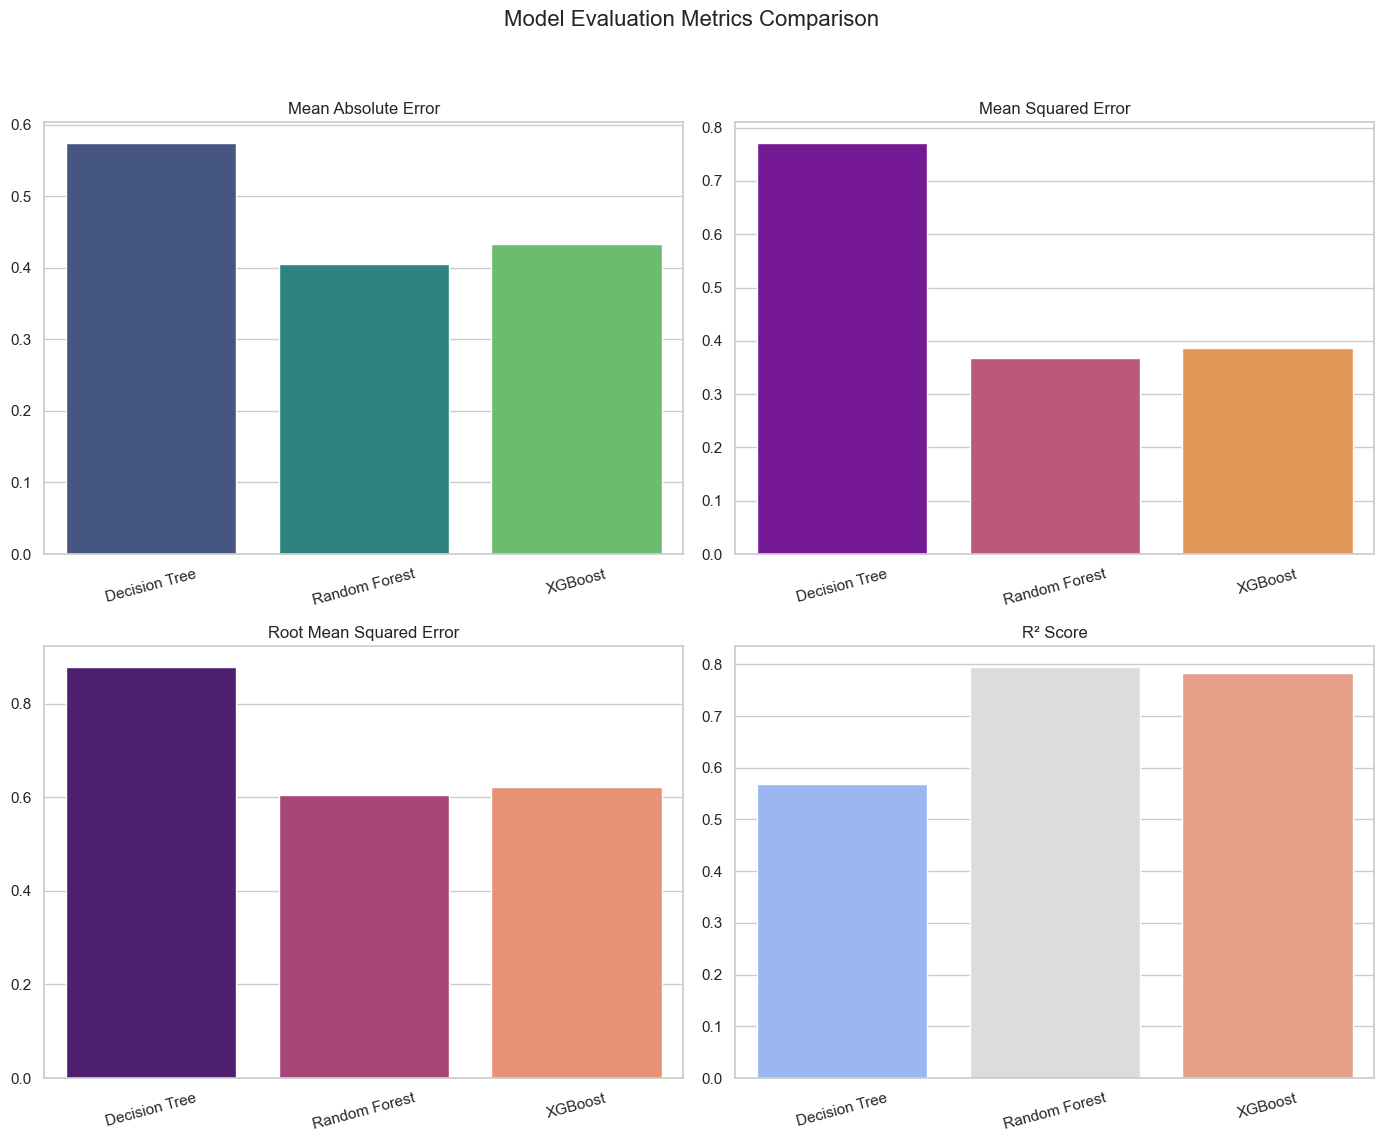

In [233]:
# Metrics data
metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [0.5743, 0.4050, 0.4327],
    'MSE': [0.7713, 0.3669, 0.3863],
    'RMSE': [0.8782, 0.6057, 0.6216],
    'R²': [0.5691, 0.7950, 0.7842]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Set up the plot aesthetics
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Model Evaluation Metrics Comparison", fontsize=16)

# Plot each metric
sns.barplot(x='Model', y='MAE', data=metrics_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Mean Absolute Error')

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Mean Squared Error')

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=axes[1, 0], palette='magma')
axes[1, 0].set_title('Root Mean Squared Error')

sns.barplot(x='Model', y='R²', data=metrics_df, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title('R² Score')

# Rotate x-axis labels if needed
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Insights

- The Decision Tree model is underperforming compared to the others. It likely overfits the training data and generalizes poorly. Decision Trees are sensitive to small variations and tend to overfit unless pruned or regularized.

- Random Forest outperforms the other two models. It handles variance better than a single Decision Tree due to its ensemble nature. Explaining nearly 80% of the variation in ratings is a strong result, suggesting it's capturing complex patterns in the data.

- XGBoost also performs well, very close to Random Forest. While its R² is slightly lower, its MAE and RMSE are competitive, meaning it’s making consistently good predictions, though perhaps with slightly less bias-variance trade-off than Random Forest in this case.

In [ ]:
# ---------------------------
# Random Forest Hyperparameter Tuning
# ---------------------------
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, scoring='r2')
rf_grid.fit(x_train, y_train)
rf_best = rf_grid.best_estimator_

# ---------------------------
# XGBoost Hyperparameter Tuning
# ---------------------------
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

xgb = XGBRegressor(random_state=42, verbosity=0)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, scoring='r2')
xgb_grid.fit(x_train, y_train)
xgb_best = xgb_grid.best_estimator_

# ---------------------------
# Evaluation Function
# ---------------------------
def evaluate_model(name, model):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"Best Parameters: {model.get_params()}")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    return {
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }

# ---------------------------
# Evaluate both tuned models
# ---------------------------
rf_results = evaluate_model("Tuned Random Forest", rf_best)
xgb_results = evaluate_model("Tuned XGBoost", xgb_best)

#Put results in DataFrame for plotting or comparison
results_df = pd.DataFrame([rf_results, xgb_results])



Tuned Random Forest Evaluation:
Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
MAE:  0.4008
MSE:  0.3625
RMSE: 0.6020
R²:   0.7975

Tuned XGBoost Evaluation:
Best Parameters: {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat

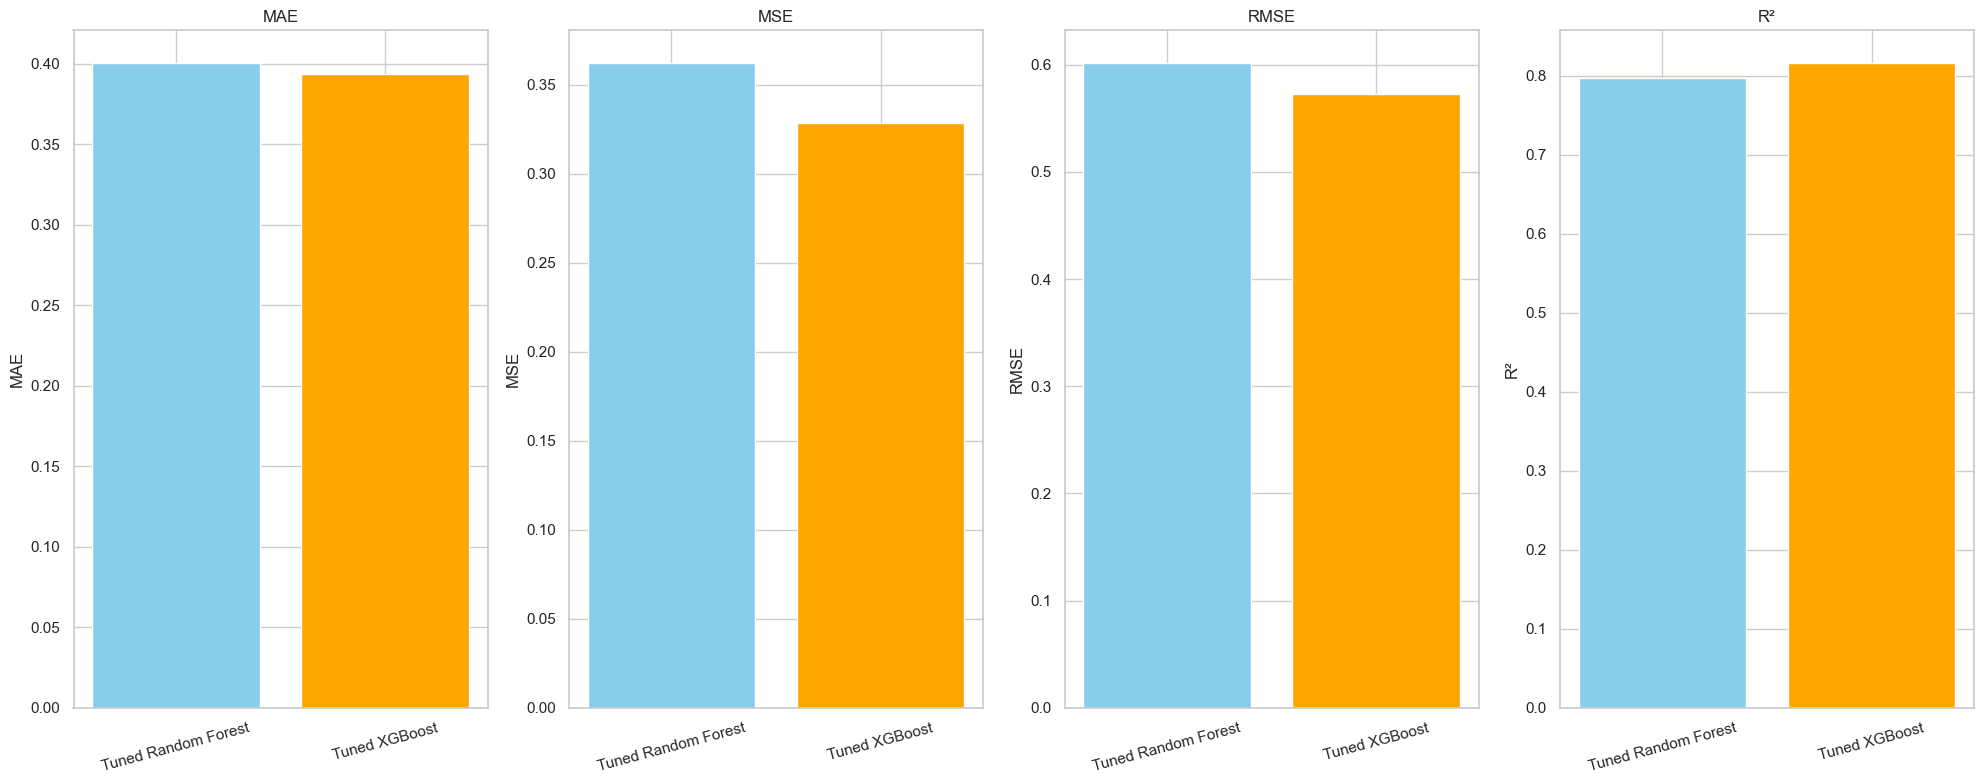

In [235]:
# Create a DataFrame of the results
results_df = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Tuned XGBoost'],
    'MAE': [0.4008, 0.3937],
    'MSE': [0.3625, 0.3283],
    'RMSE': [0.6020, 0.5730],
    'R²': [0.7975, 0.8166]
})

# Plotting
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
fig, axs = plt.subplots(1, 4, figsize=(20, 8))

for i, metric in enumerate(metrics):
    axs[i].bar(results_df['Model'], results_df[metric], color=['skyblue', 'orange'])
    axs[i].set_title(metric)
    axs[i].set_ylabel(metric)
    axs[i].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


#### Insights

- XGBoost wins on all metrics, but the margin is small.

- R² of 0.8166 means XGBoost explains ~82% of the variance in ratings.

- MAE and RMSE being below 0.6 means predictions are close to actual ratings (which are usually on a 1–10 scale), which is good.

- Both models are strong, but tuned XGBoost is the best performer.

In [ ]:
# Save the best XGBoost model
joblib.dump(xgb_best, 'tuned_xgboost_model.pkl')
print("Tuned XGBoost model saved as 'tuned_xgboost_model.pkl'")


Tuned XGBoost model saved as 'tuned_xgboost_model.pkl'


---
<a href=#nine></a>
## **Model Deployment**
Model deployment is the process of making a trained machine learning model available for use in a real-world application. In this project, the model was deployed using Streamlit, which provides an interactive and user-friendly web interface. This step is important because it allows users to interact with the model, make predictions, and gain insights without needing to understand the underlying code or algorithms.

Link to the app: (https://movieratingbaseapp.streamlit.app/)

---
<a href=#nine></a>
## **Conclusion and Future Work**


##### Conclusion
In this project, different machine learning models were explored to predict movie ratings based on features such as year, votes, duration, and average ratings of genres, directors, and actors. After training and evaluating three models, Decision Tree, Random Forest, and XGBoost. It was found that:

- The XGBoost model achieved the best performance, this performance indicates that the model can explain approximately 81.7% of the variance in the target variable (movie ratings), making it a strong candidate for deployment.

- Hyperparameter tuning helped both Random Forest and XGBoost improve their predictions, but XGBoost consistently performed better across all metrics.


##### Future Work

- Add Text Features: Extract sentiment or keyword scores from movie summaries or reviews (NLP).

- Use External Data: Integrate Box Office revenues, Rotten Tomatoes scores, or production budget.

- Regularization Techniques: Explore Ridge, Lasso, or ElasticNet to improve generalization.

- Model Interpretability Tools: Use SHAP or LIME to explain feature importance.

- Deep Learning Models: Use neural networks for capturing complex nonlinear patterns if dataset size supports it.

---
<a href=#ten></a>
## **References**
- IMDb-Movies-India-Dataset [IMDb Movies India.csv]. Retrieved from Kaggle: https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

- Movie Image [Movie.jpg]. Retrieved from https://storage.googleapis.com/kaggle-datasets-images/1867204/3122809/6dd06ad75dfe450aeaf370a7348600f3/dataset-card.jpg?t=2022-02-01-05-41-22

- Ndebele, N. (2025). Movie Rating Prediction Tool [https://movieratingbaseapp.streamlit.app/)]. Developed using Streamlit.]. Developed using Streamlit.

## Additional Sections to Consider

**Contributors**: Nozipho Sithembiso Ndebele
